In [91]:
# Import The Necessary librarys
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import os 

In [92]:
# Upload Our Data
data_call=pd.read_csv("players_data_light-2024_2025.csv")

In [93]:
# Forward Data
att_data=data_call[data_call["Pos"]=="FW"]
features=["Player","Nation","Pos","Squad","Comp","Age","MP","Starts","Min","90s","Gls","Ast","G+A","G-PK","xG","npxG","xAG"]   # Choose The Attacking Stats
att_data=att_data[features].reset_index(drop=True).rename(lambda x:x+1)

In [94]:
# Remove the Abbreviation of each nation
att_data["Nation"]=att_data["Nation"].apply(lambda x: str(x).split()[-1])

In [95]:
# Show the first five rows
att_data.head()

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,xG,npxG,xAG
1,Keyliane Abdallah,FRA,FW,Marseille,fr Ligue 1,18.0,1,0,3,0.0,0,0,0,0,0.0,0.0,0.0
2,Matthis Abline,FRA,FW,Nantes,fr Ligue 1,21.0,34,33,2768,30.8,9,2,11,8,8.5,7.7,3.8
3,Tammy Abraham,ENG,FW,Roma,it Serie A,26.0,1,0,1,0.0,0,0,0,0,0.0,0.0,0.0
4,Tammy Abraham,ENG,FW,Milan,it Serie A,26.0,28,12,1183,13.1,3,4,7,2,7.1,5.4,2.2
5,Akor Adams,NGA,FW,Sevilla,es La Liga,24.0,4,1,134,1.5,0,0,0,0,0.4,0.4,0.0


In [96]:
# Check the duplicated data
print(att_data.duplicated().sum())  # No duplicated data

0


In [97]:
# Number of Rows and Columns 
att_data.shape
print(f"Number of Rows : {att_data.shape[0]}")
print(f"Number of Columns : {att_data.shape[1]}")

Number of Rows : 371
Number of Columns : 17


In [98]:
# Data infos
att_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 1 to 371
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  371 non-null    object 
 1   Nation  371 non-null    object 
 2   Pos     371 non-null    object 
 3   Squad   371 non-null    object 
 4   Comp    371 non-null    object 
 5   Age     369 non-null    float64
 6   MP      371 non-null    int64  
 7   Starts  371 non-null    int64  
 8   Min     371 non-null    int64  
 9   90s     371 non-null    float64
 10  Gls     371 non-null    int64  
 11  Ast     371 non-null    int64  
 12  G+A     371 non-null    int64  
 13  G-PK    371 non-null    int64  
 14  xG      371 non-null    float64
 15  npxG    371 non-null    float64
 16  xAG     371 non-null    float64
dtypes: float64(5), int64(7), object(5)
memory usage: 52.2+ KB


In [99]:
# Create a new column for each player's points
att_data.loc[:,"Points"]= att_data["Gls"]*3 + att_data["Ast"]*2 + (att_data["Gls"] - att_data["G-PK"])*2
att_data=att_data.sort_values(by='Points',ascending=False).reset_index(drop=True).rename(lambda x:x+1)
att_data.head(10) # Show the top 10 forwards by points 

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,xG,npxG,xAG,Points
1,Mohamed Salah,EGY,FW,Liverpool,eng Premier League,32.0,38,38,3371,37.5,29,18,47,20,25.2,18.2,14.2,141
2,Harry Kane,ENG,FW,Bayern Munich,de Bundesliga,31.0,31,28,2381,26.5,26,9,35,17,20.3,13.3,5.3,114
3,Kylian Mbappé,FRA,FW,Real Madrid,es La Liga,25.0,34,34,2907,32.3,31,3,34,24,25.9,18.6,7.7,113
4,Mateo Retegui,ITA,FW,Atalanta,it Serie A,25.0,36,32,2383,26.5,25,8,33,21,18.9,14.9,4.9,99
5,Robert Lewandowski,POL,FW,Barcelona,es La Liga,35.0,34,32,2667,29.6,27,2,29,24,27.1,24.0,2.3,91
6,Alexander Isak,SWE,FW,Newcastle Utd,eng Premier League,24.0,34,34,2756,30.6,23,6,29,19,20.3,17.2,4.3,89
7,Ante Budimir,CRO,FW,Osasuna,es La Liga,33.0,38,34,2952,32.8,21,4,25,13,18.3,12.3,1.7,87
8,Bryan Mbeumo,CMR,FW,Brentford,eng Premier League,24.0,38,38,3414,37.9,20,7,27,15,12.3,7.5,8.3,84
9,Erling Haaland,NOR,FW,Manchester City,eng Premier League,24.0,31,31,2736,30.4,22,3,25,19,22.0,18.8,3.0,78
10,Ousmane Dembélé,FRA,FW,Paris S-G,fr Ligue 1,27.0,29,20,1730,19.2,21,6,27,20,16.6,15.8,8.2,77


Text(0, 0.5, 'Number of Players')

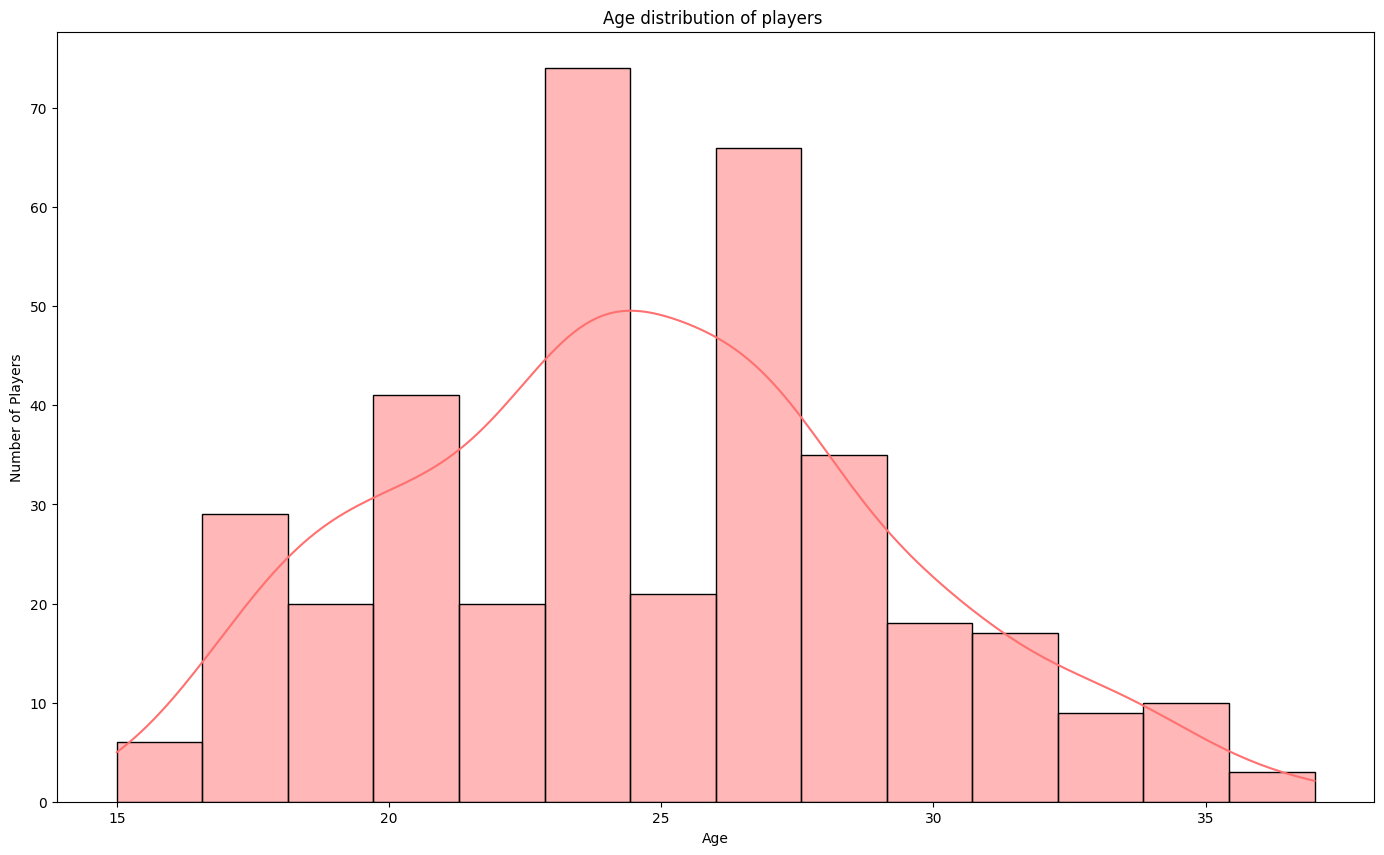

In [100]:
# Age distribution of players 
plt.figure(figsize=(17,10))
sns.histplot(att_data["Age"],color="#FF7070",kde=True)
# Add a title and labels
plt.title("Age distribution of players ")
plt.ylabel("Number of Players")

Text(0.5, 1.0, 'Number of players per league')

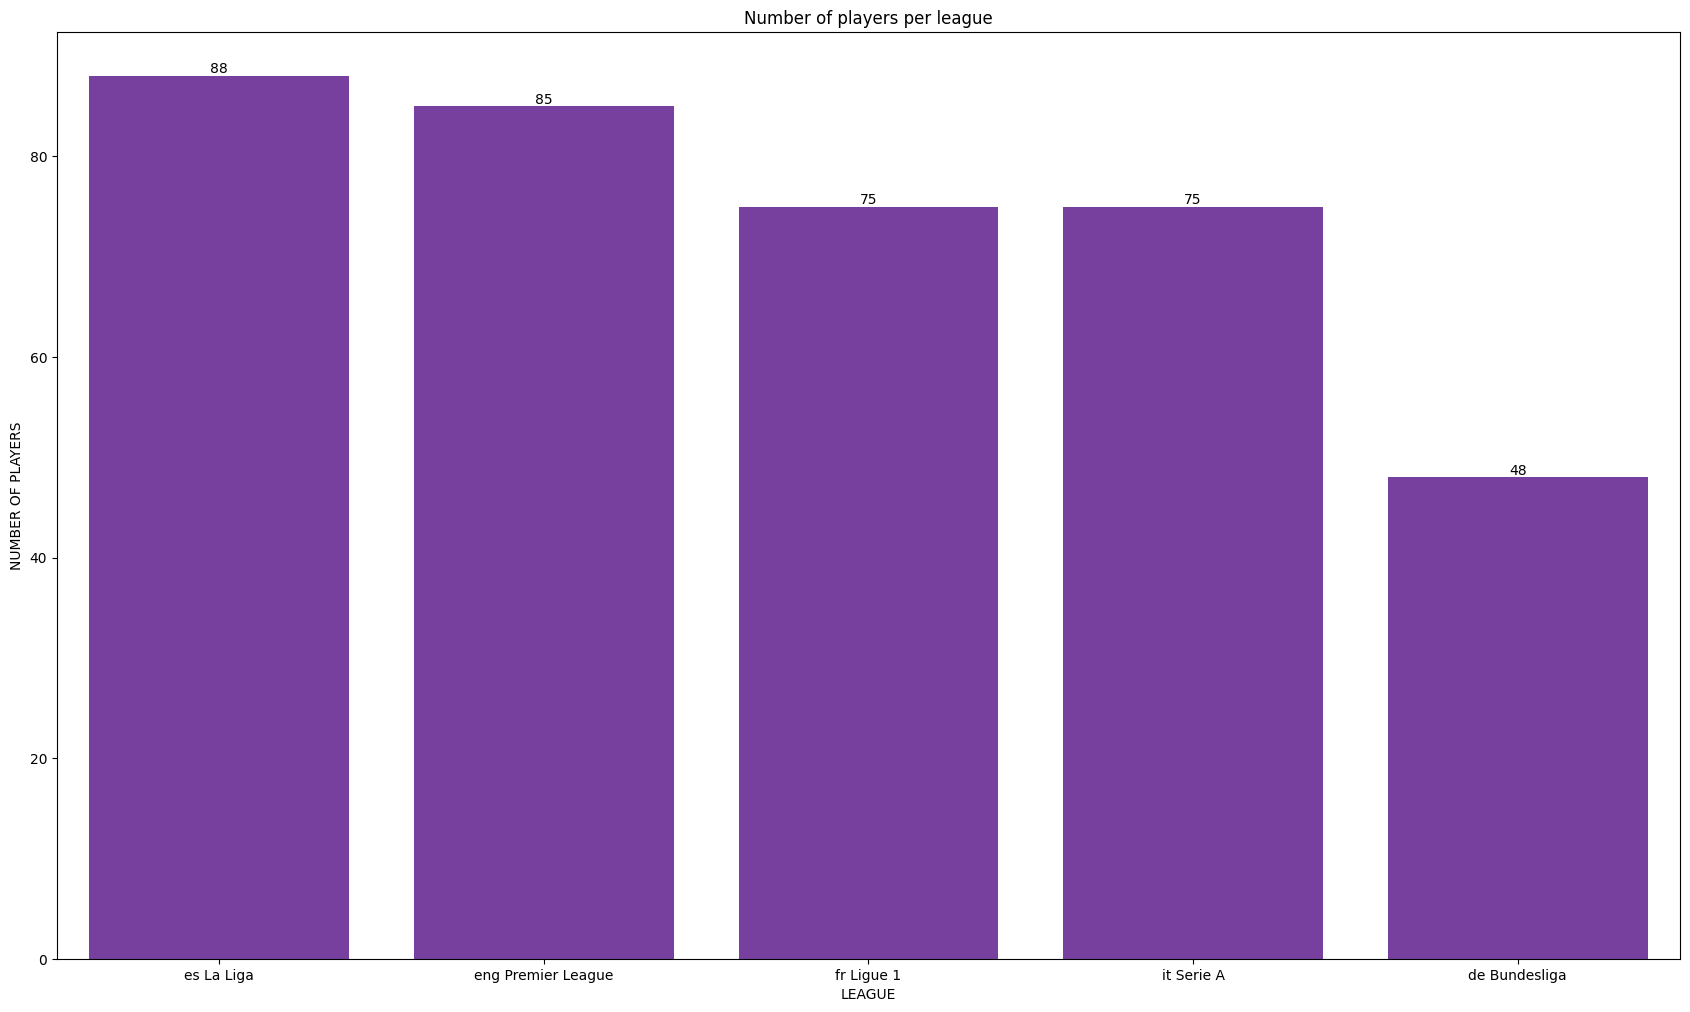

In [101]:
# Number of players per league
temp=att_data.groupby("Comp").agg(
    Number_of_Players=("Player",'count')
)
temp=temp.sort_values(by='Number_of_Players',ascending=False).reset_index()
plt.figure(figsize=(17,10))
sns.barplot(x=temp["Comp"],y=temp["Number_of_Players"],color="#7a30ae")
# Write the values ​​in the plot
for i,v in enumerate(temp["Number_of_Players"]):
    plt.text(i,v,str(v),va='bottom',ha='center')
# Add title and labels
plt.xlabel("LEAGUE")
plt.ylabel("NUMBER OF PLAYERS")
plt.tight_layout()
plt.title("Number of players per league")


In [102]:
# Min , Max and Average age for each nation
Nation_age=att_data.groupby("Nation").agg(
    Min=("Age",'min'),
    Max=("Age",'max'),
    Average=("Age",'mean')
).reset_index().rename(lambda x:x+1)
Nation_age.head(10)

,Nation,Min,Max,Average
1,ALB,22.0,22.0,22.000000
2,ALG,24.0,32.0,27.666667
3,ANG,26.0,27.0,26.500000
4,ARG,18.0,30.0,24.000000
5,ARM,21.0,21.0,21.000000
6,AUT,23.0,35.0,28.750000
7,BEL,19.0,31.0,24.111111
8,BFA,22.0,22.0,22.000000
9,BIH,26.0,34.0,31.000000
10,BRA,18.0,30.0,24.545455


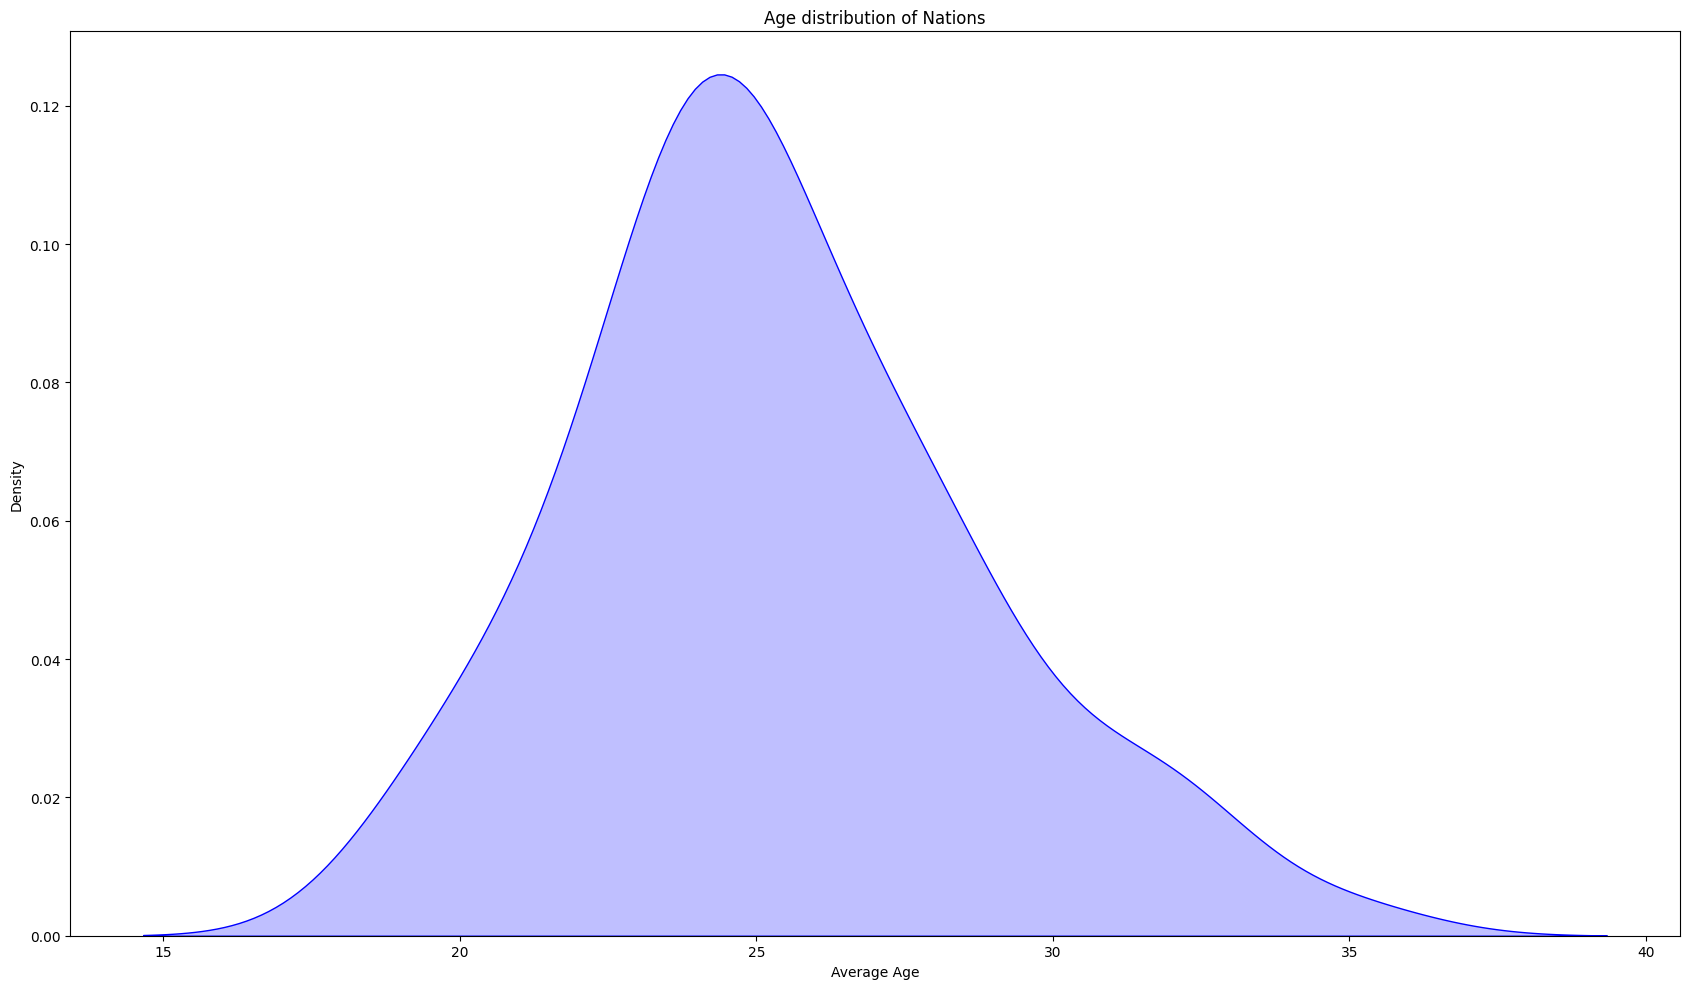

In [103]:
# Age distribution of Nations
plt.figure(figsize=(17,10))
sns.kdeplot(Nation_age["Average"],fill=True,color="Blue")
# Add title and labels
plt.xlabel("Average Age")
plt.title("Age distribution of Nations")
plt.tight_layout()

In [104]:
# Distribution of goals by nation
Nation_goals=att_data.groupby("Nation").agg(
    Goals=("Gls",'sum'),
    Goals_Pen=("G-PK",'sum')
).sort_values(by='Goals',ascending=False).reset_index().rename(lambda x:x+1)
Nation_goals

,Nation,Goals,Goals_Pen
1,FRA,238,206
2,ENG,132,113
3,ESP,129,114
4,ITA,110,98
5,GER,89,83
...,...,...,...
66,MSR,0,0
67,PUR,0,0
68,ROU,0,0
69,TUN,0,0


Text(0.5, 1.0, 'Distribution of goals by nation')

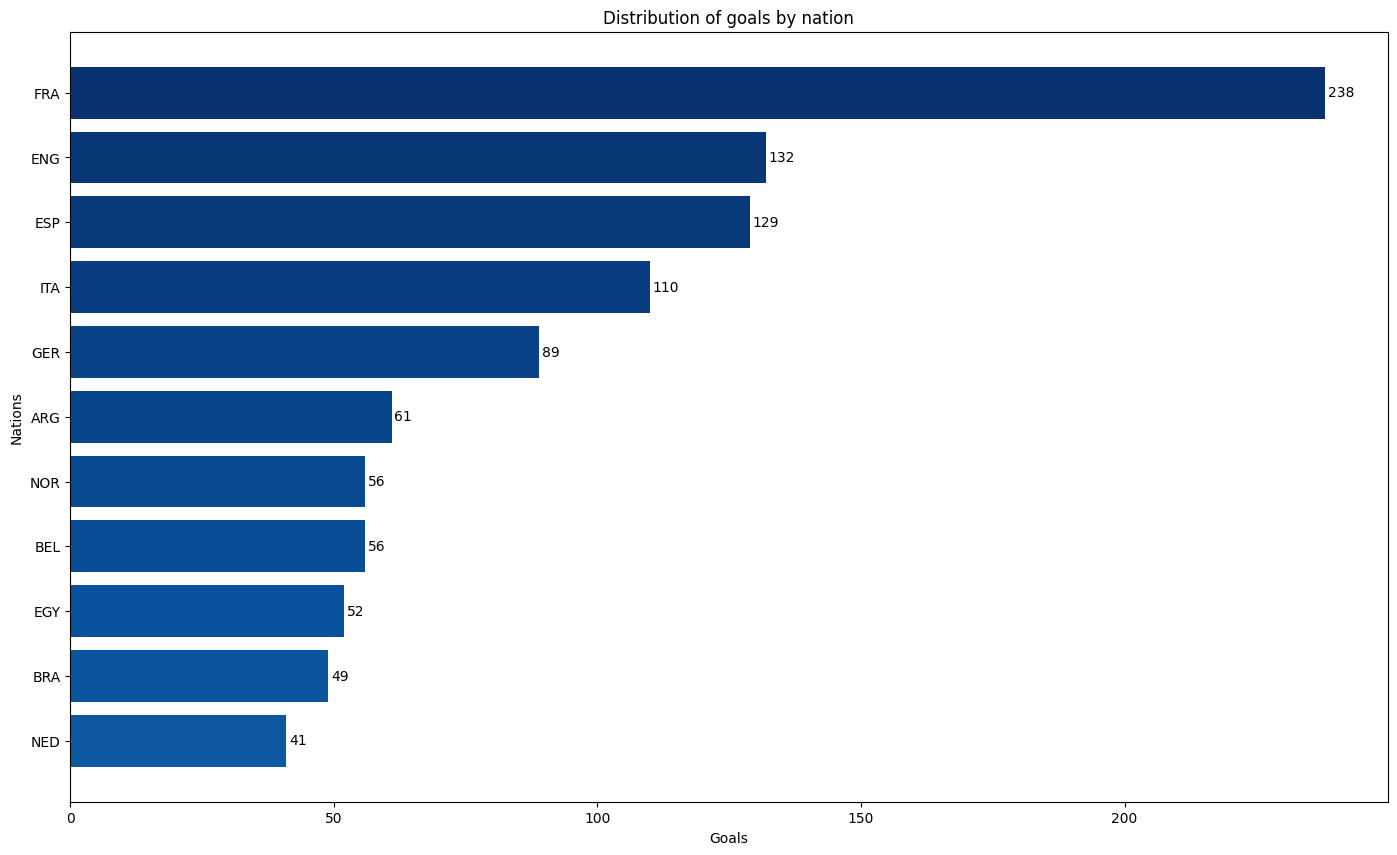

In [105]:
# Distribution of goals by nation
plt.figure(figsize=(17,10))
colors = list(reversed(sns.color_palette("Blues", len(Nation_goals))))
temp=Nation_goals[Nation_goals["Goals"]>=40]
plt.barh(temp["Nation"],temp["Goals"],color=colors)
# Invert y-axis so highest is on top
plt.gca().invert_yaxis()
# Write the values ​​in the plot
for i,g in enumerate(temp["Goals"]):
    plt.text(temp["Goals"].iloc[i]+0.5,i,g,va='center')
# Add title and labels
plt.xlabel("Goals")
plt.ylabel("Nations")
plt.title("Distribution of goals by nation")

C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\1133055928.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Gls"], palette='Blues_r' ,ax=axes[i])
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\1133055928.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Gls"], palette='Blues_r' ,ax=axes[i])
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\1133055928.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Gls"], palette='Blues_r' ,ax=axes[i])
C:\Users\aouam\AppD

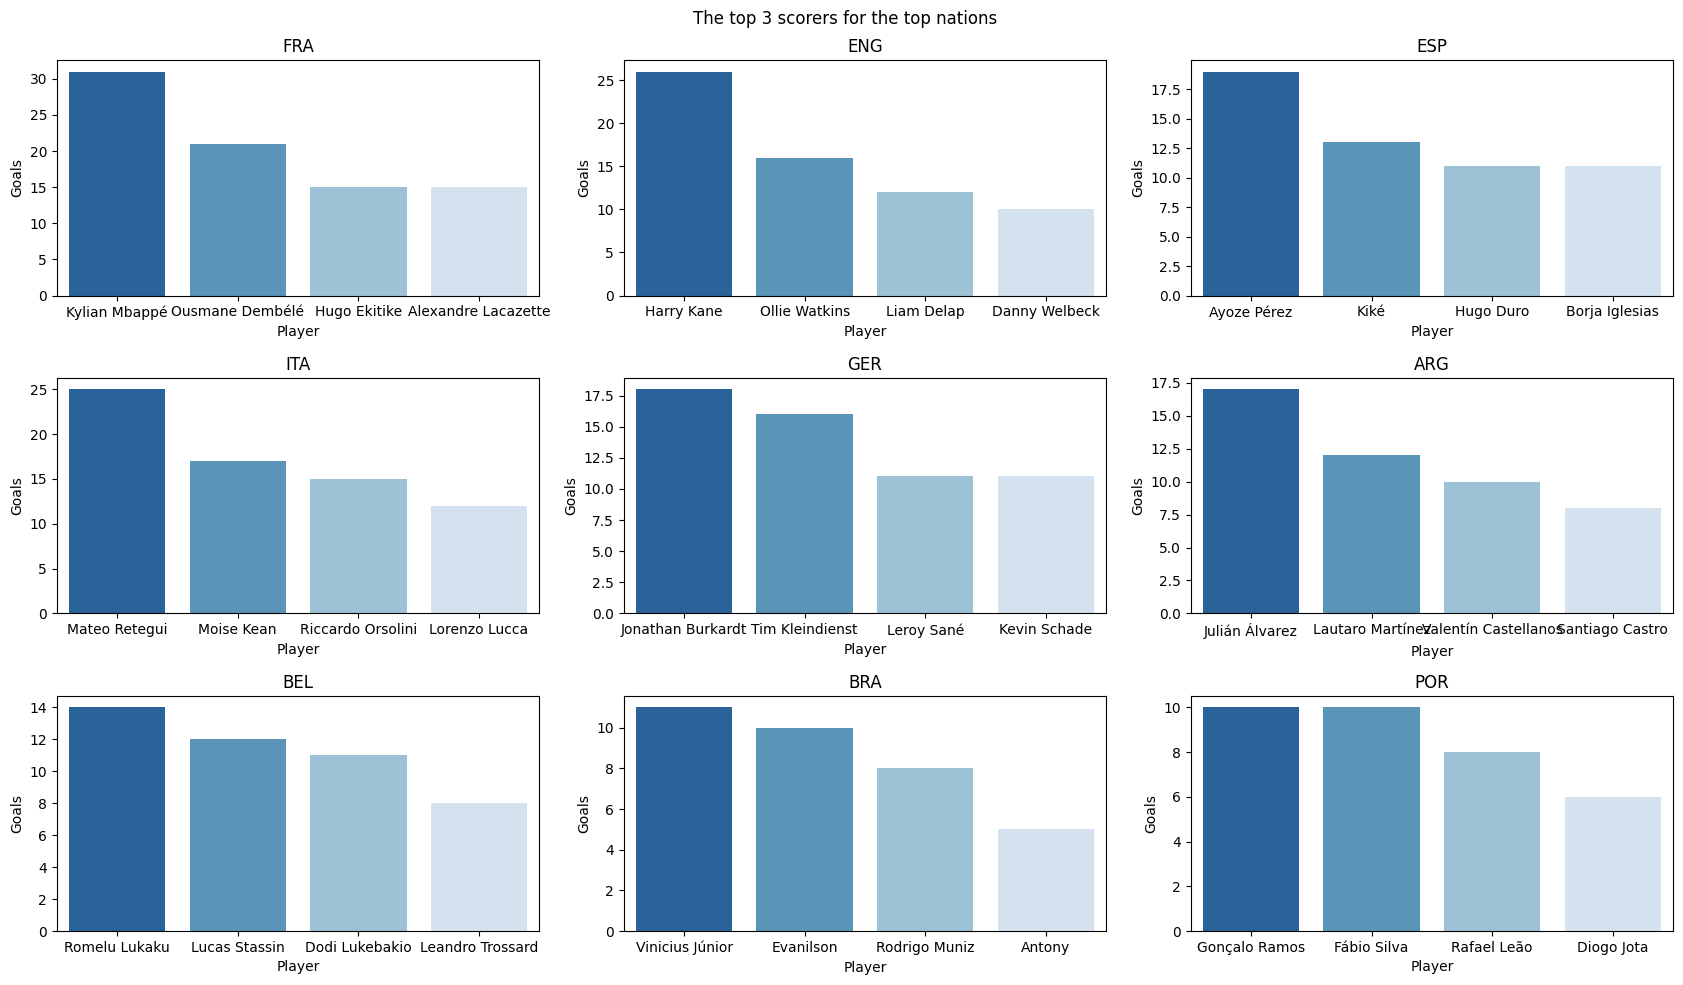

In [ ]:
# The top 3 scorers for the top nations
Nations=["FRA","ENG","ESP","ITA","GER","ARG","BEL","BRA","POR"]
fig,axes=plt.subplots(3,3,figsize=(17,10))
axes=axes.flatten()
for i,n in enumerate(Nations):
    data=att_data[att_data["Nation"]==n]
    data=data.sort_values(by='Gls',ascending=False).head(4)
    sns.barplot(x=data["Player"],y=data["Gls"], palette='Blues_r' ,ax=axes[i])
    axes[i].set_title(n)
    axes[i].set_ylabel("Goals")
# Add title and labels
plt.suptitle("The top 3 scorers for the top nations")
plt.tight_layout()

In [107]:
# Distribution Of Assist by Nation 
Nations_assist=att_data.groupby("Nation").agg(
    Assist=('Ast','sum')
).sort_values(by='Assist',ascending=False).reset_index().rename(lambda x:x+1)
Nations_assist    #Rank

,Nation,Assist
1,FRA,80
2,ENG,66
3,ESP,42
4,GER,36
5,ITA,31
...,...,...
66,ROU,0
67,PUR,0
68,TUN,0
69,TUR,0


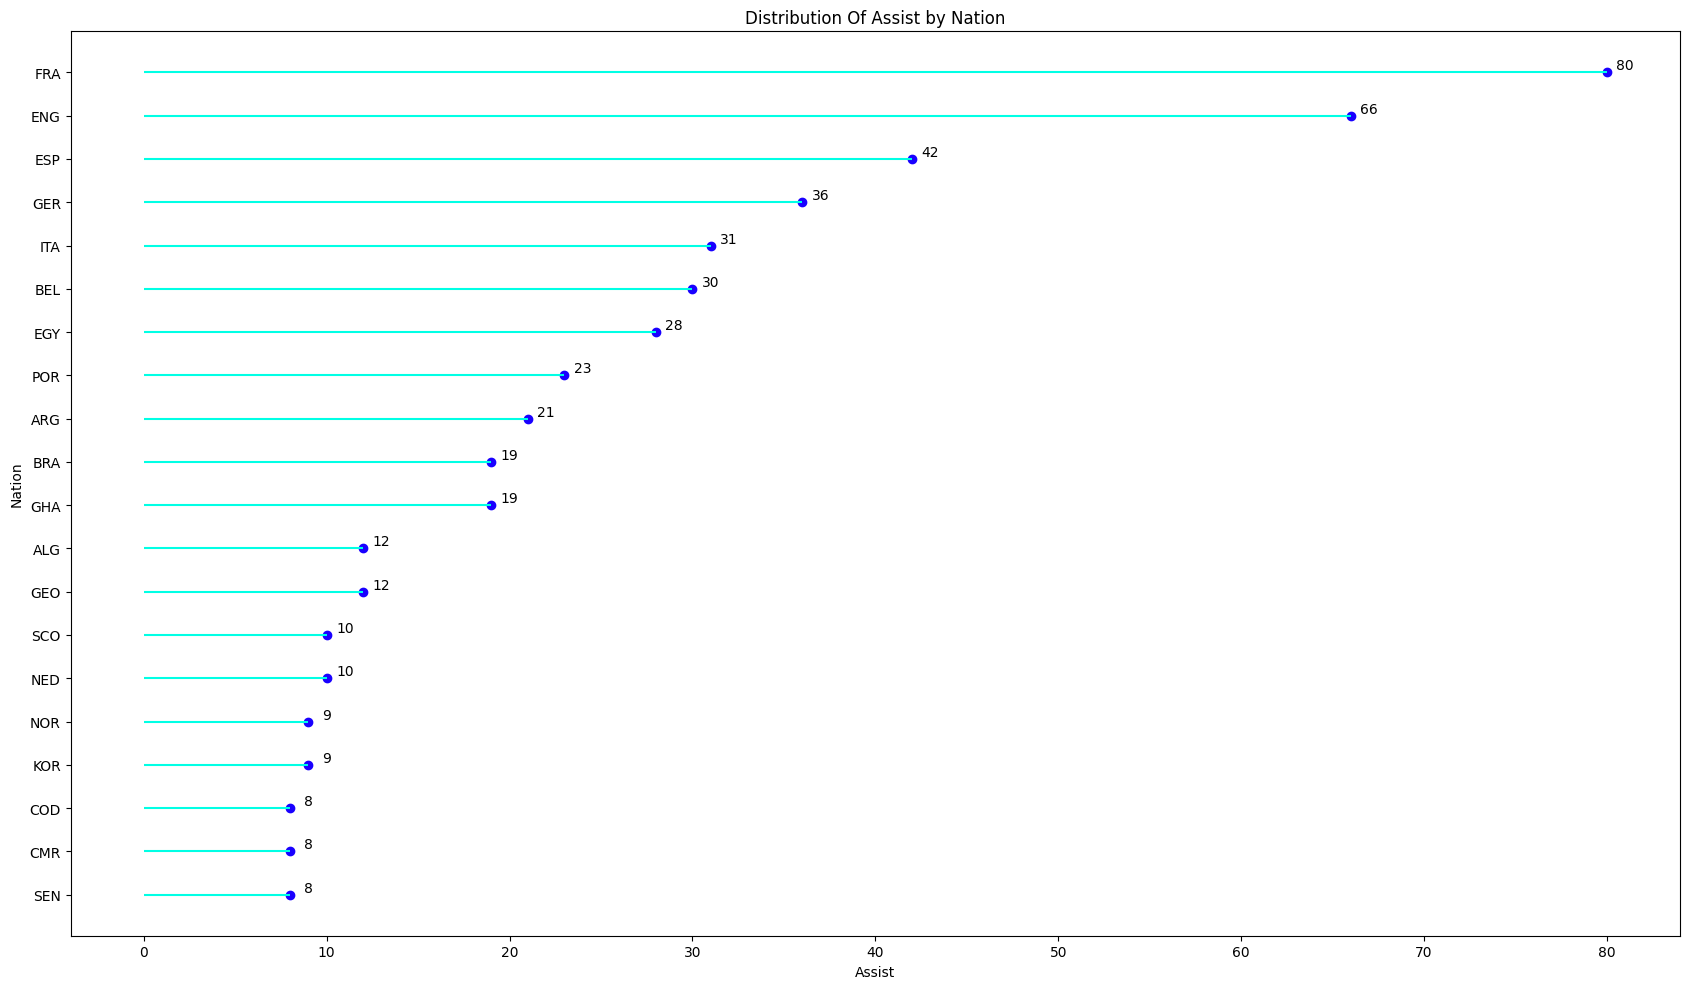

In [108]:
# Distribution Of Assist by Nation
temp=Nations_assist.head(20)
plt.figure(figsize=(17,10))
plt.hlines(y=temp["Nation"],xmin=0,xmax=temp["Assist"],colors="#00FFE5")   # Hlines plot 
plt.scatter(temp["Assist"],temp["Nation"],color="#1900ff")  # Scatter plot
# Invert y-axis so highest is on top
plt.gca().invert_yaxis()
# Write the values ​​in the plot
for i,a in enumerate(temp["Assist"]):
    plt.text(temp["Assist"].iloc[i]+1,i,a,va='bottom',ha='center')
# Add title and labels
plt.title("Distribution Of Assist by Nation")
plt.xlabel("Assist")
plt.ylabel("Nation")
plt.tight_layout()


C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\3421159012.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Ast"],ax=axes[i],palette='Blues_r')
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\3421159012.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Ast"],ax=axes[i],palette='Blues_r')
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\3421159012.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Ast"],ax=axes[i],palette='Blues_r')
C:\Users\aouam\AppData\Lo

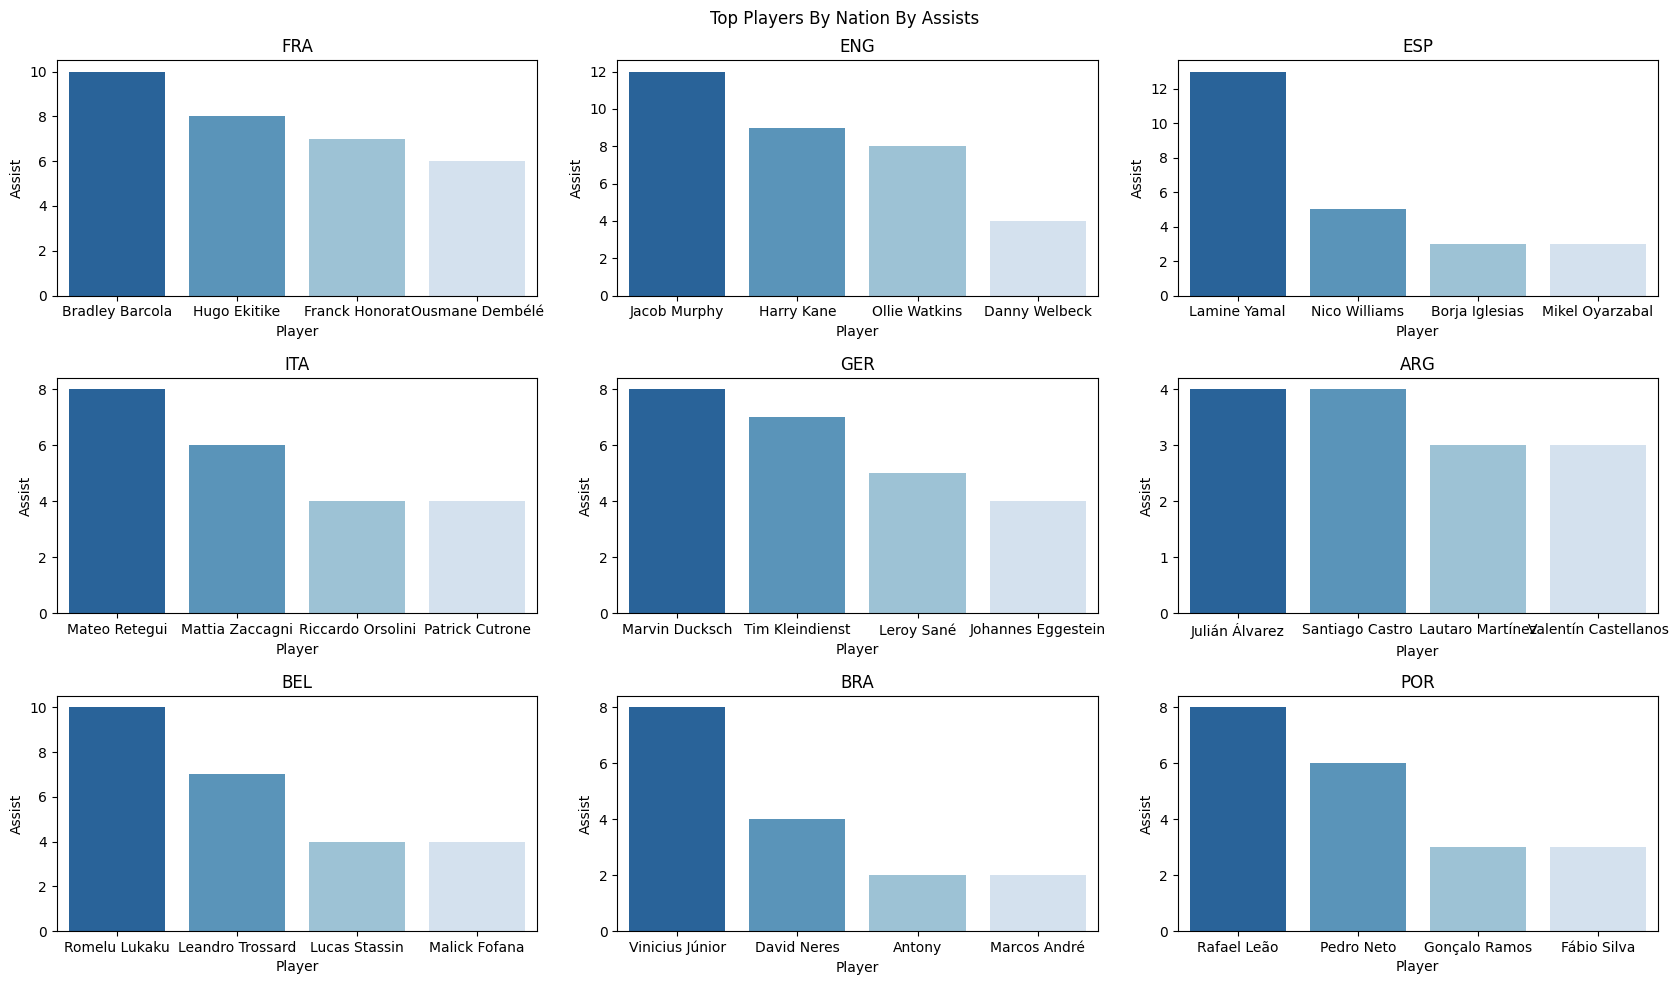

In [ ]:
# Top Players By Nation By Assists
fig,axes=plt.subplots(3,3,figsize=(17,10))
axes=axes.flatten()
for i , n in enumerate(Nations):
    data=att_data[att_data["Nation"]==n]
    data=data.sort_values(by='Ast',ascending=False).head(4)
    sns.barplot(x=data["Player"],y=data["Ast"],ax=axes[i],palette='Blues_r')
    axes[i].set_title(n)
    axes[i].set_ylabel("Assist")
# Add title and labels
plt.suptitle("Top Players By Nation By Assists")
plt.tight_layout()



In [110]:
# Min , Max and Average age for each nation
League_age=att_data.groupby("Comp").agg(
    Min=("Age",'min'),
    Max=("Age",'max'),
    Average=("Age",'mean')
).reset_index().rename(lambda x:x+1)
League_age


,Comp,Min,Max,Average
1,de Bundesliga,17.0,34.0,25.638298
2,eng Premier League,15.0,37.0,24.547619
3,es La Liga,17.0,37.0,24.397727
4,fr Ligue 1,15.0,34.0,23.626667
5,it Serie A,16.0,36.0,25.546667


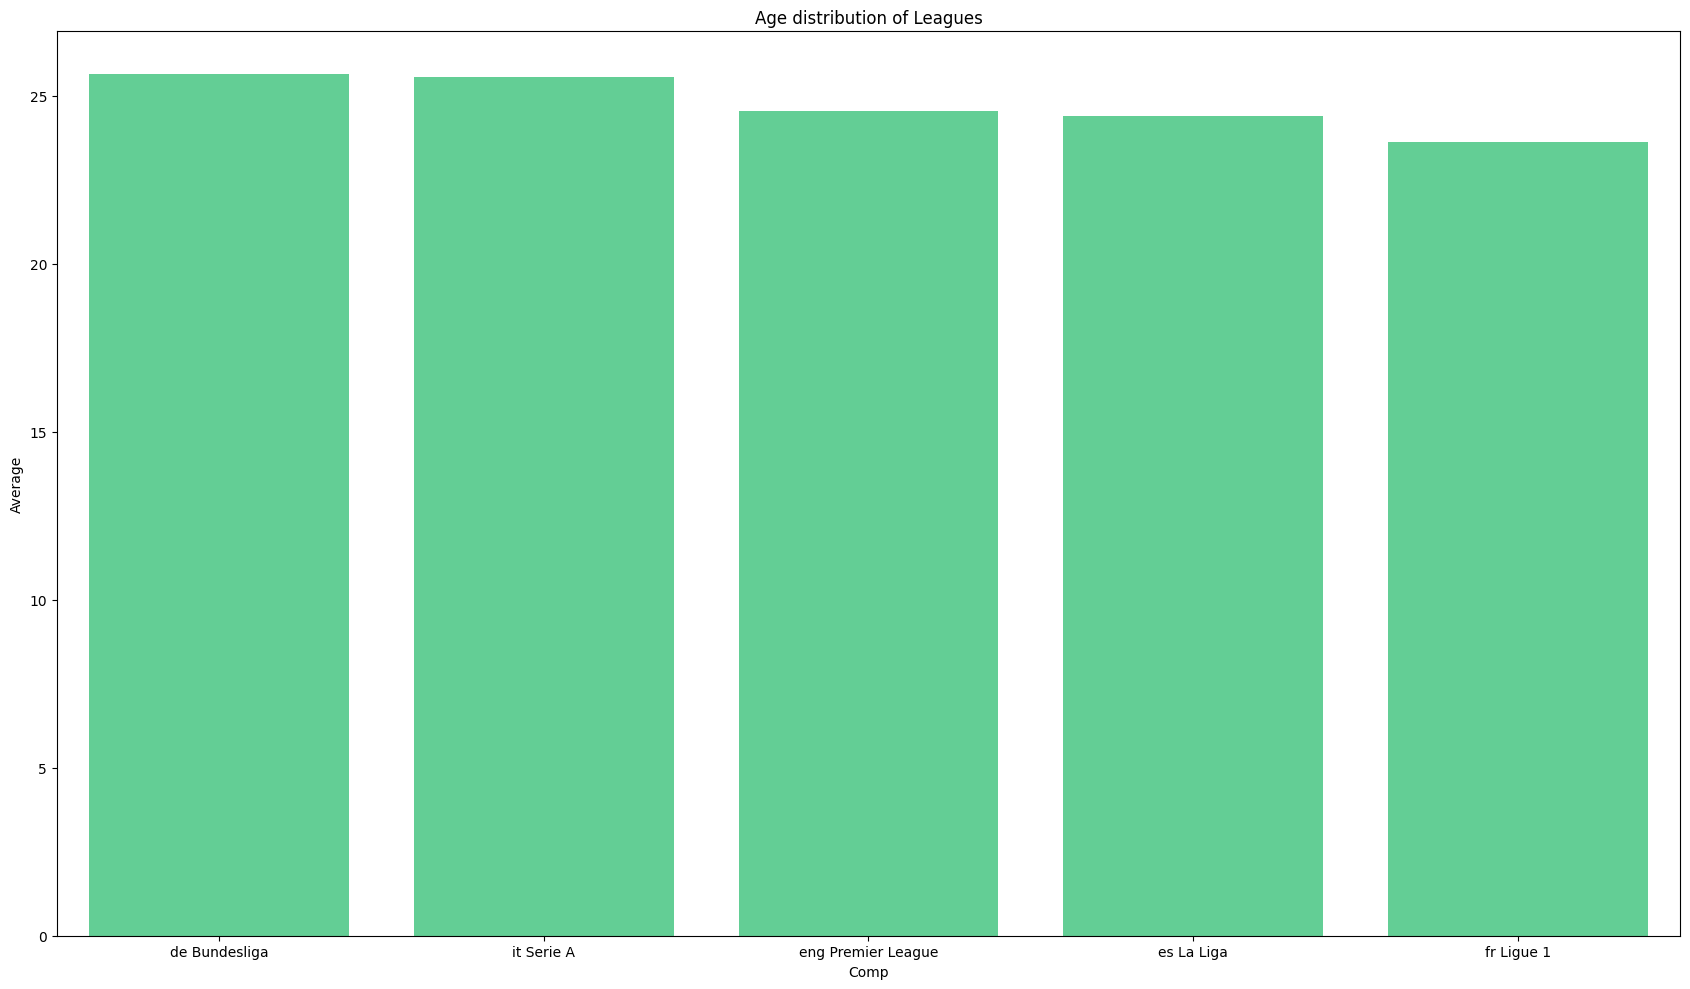

In [ ]:
#  Age distribution of Leagues
temp=League_age.sort_values(by='Average',ascending=False).reset_index().rename(lambda x:x+1)
plt.figure(figsize=(17,10))
sns.barplot(x=temp["Comp"],y=temp["Average"],color="#51E094")
# Add title and labels
plt.title("Age distribution of Leagues")
plt.tight_layout()


In [112]:
# Distribution of goals by League 
League_goals=att_data.groupby('Comp').agg(
    Goals=("Gls",'sum')
).sort_values(by='Goals',ascending=False).reset_index().rename(lambda x:x+1)
League_goals

,Comp,Goals
1,eng Premier League,452
2,es La Liga,369
3,it Serie A,324
4,fr Ligue 1,270
5,de Bundesliga,268


Text(57.847222222222214, 0.5, 'Leagues')

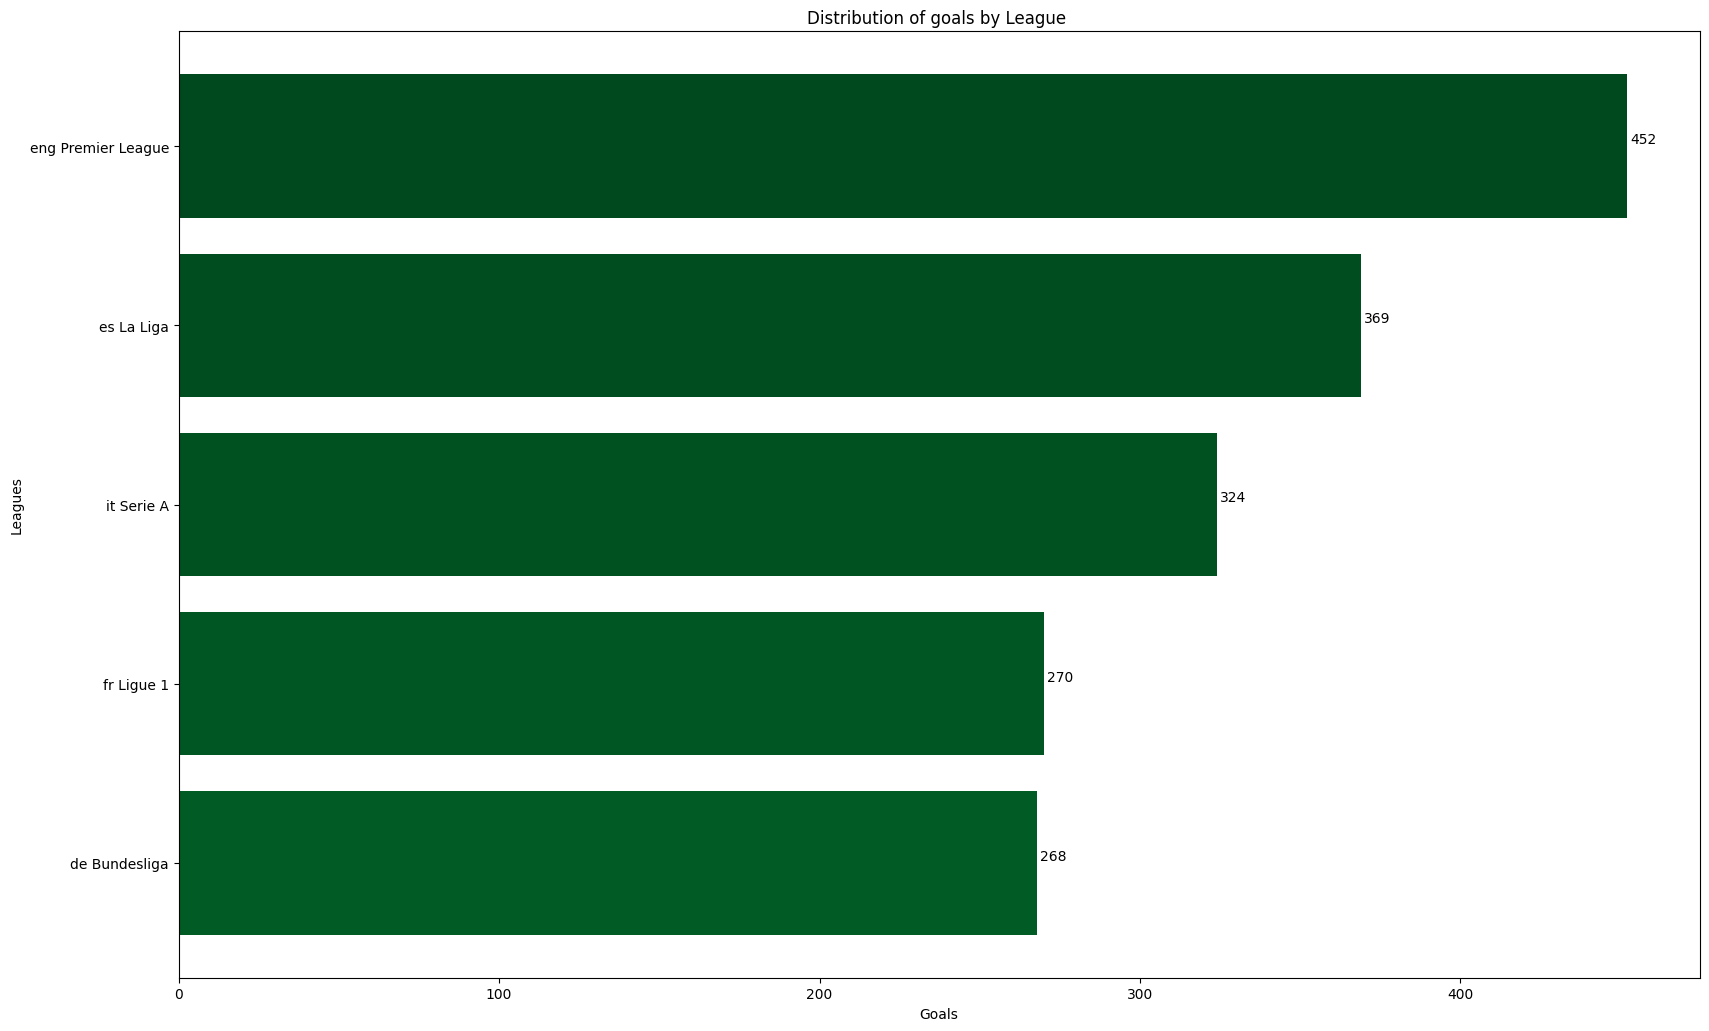

In [113]:
# Distribution of goals by League 
plt.figure(figsize=(17,10))
colors = list(reversed(sns.color_palette("Greens", len(Nation_goals))))
plt.barh(League_goals["Comp"],League_goals["Goals"],color=colors)
# Invert y-axis so highest is on top
plt.gca().invert_yaxis()
# Write the values ​​in the plot
for i,v in enumerate(League_goals["Goals"]):
    plt.text(League_goals["Goals"].iloc[i]+5,i,v,va='bottom',ha='center')
# Add title and labels
plt.tight_layout()
plt.title("Distribution of goals by League ")
plt.xlabel("Goals")
plt.ylabel("Leagues")



C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\1153786038.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Gls"],ax=axes[i],palette='Greens_r')
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\1153786038.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Gls"],ax=axes[i],palette='Greens_r')
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\1153786038.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Gls"],ax=axes[i],palette='Greens_r')
C:\Users\aouam\AppData

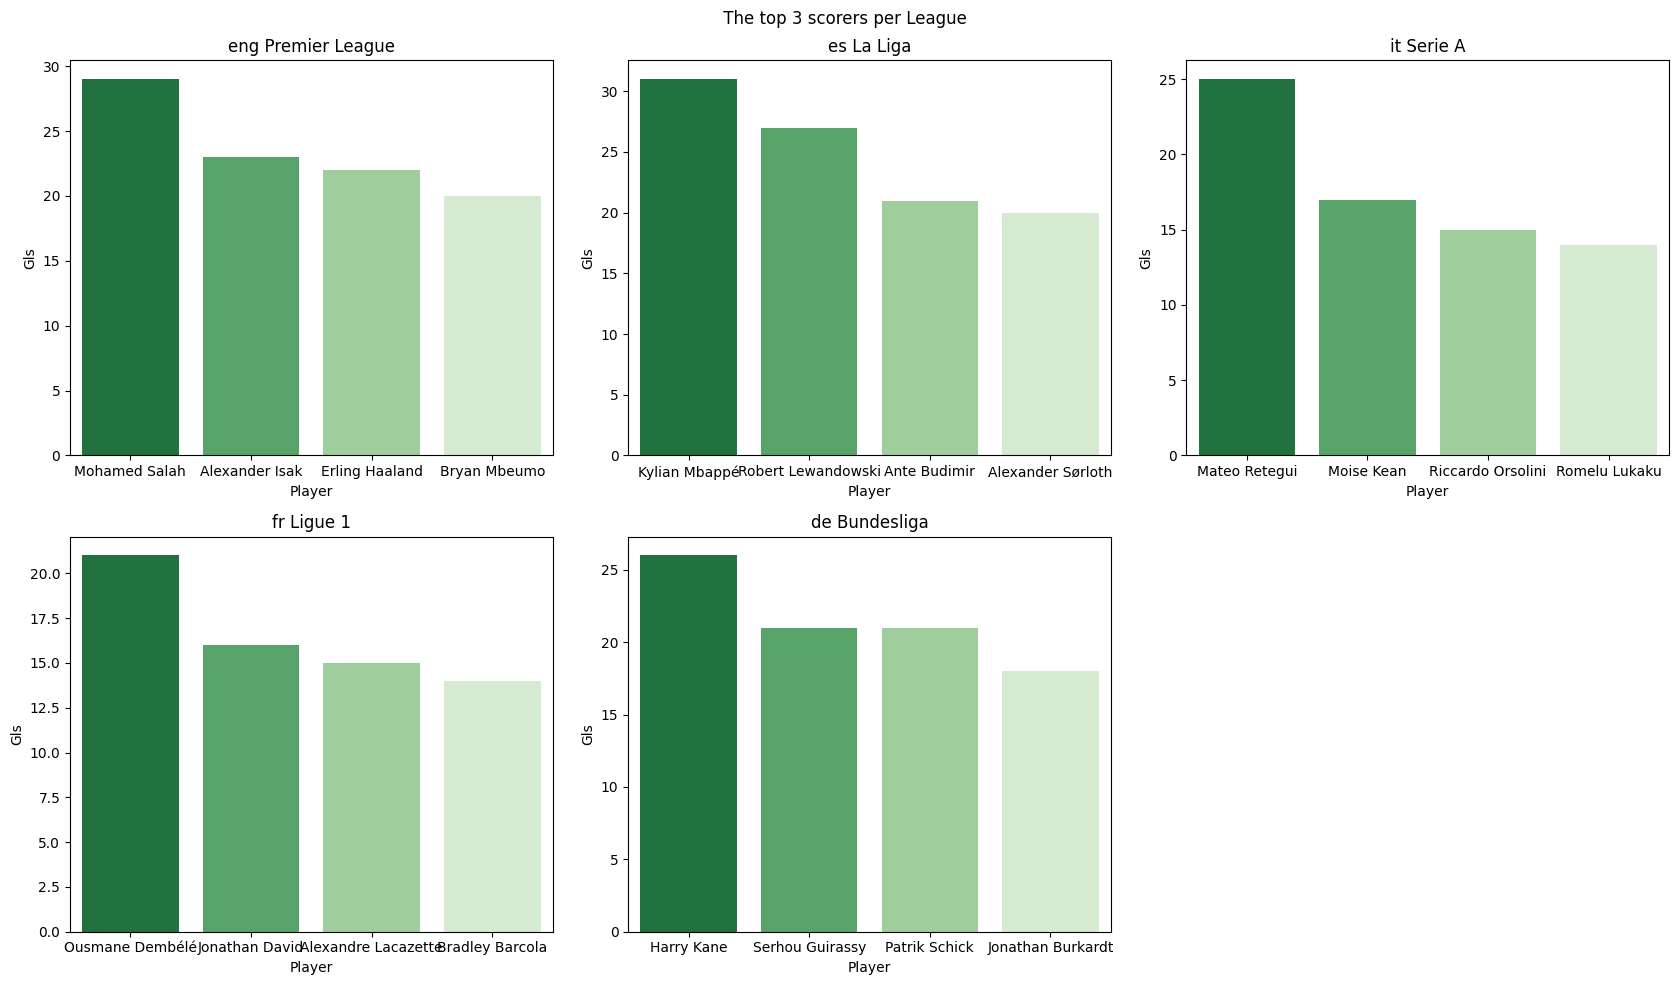

In [ ]:
# The top 3 scorers per League 
fig,axes=plt.subplots(2,3,figsize=(17,10))
axes=axes.flatten()
Leagues=League_goals["Comp"]
for i,league in enumerate(Leagues):
    data=att_data[att_data["Comp"]==league]
    data=data.sort_values(by='Gls',ascending=False).head(4)
    sns.barplot(x=data["Player"],y=data["Gls"],ax=axes[i],palette='Greens_r')
    axes[i].set_title(league)
plt.suptitle(" The top 3 scorers per League ")
plt.tight_layout()
# Delete the empty plots 
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

In [115]:
# Distribution Of Assist by League 
plt.figure(figsize=(17,10))
League_assist=att_data.groupby('Comp').agg(
    Assist=('Ast','sum')
).sort_values(by='Assist',ascending=False).reset_index().rename(lambda x:x+1)
League_assist

,Comp,Assist
1,eng Premier League,173
2,it Serie A,127
3,es La Liga,109
4,de Bundesliga,98
5,fr Ligue 1,93


<Figure size 1700x1000 with 0 Axes>

Text(0, 0.5, 'Leagues')

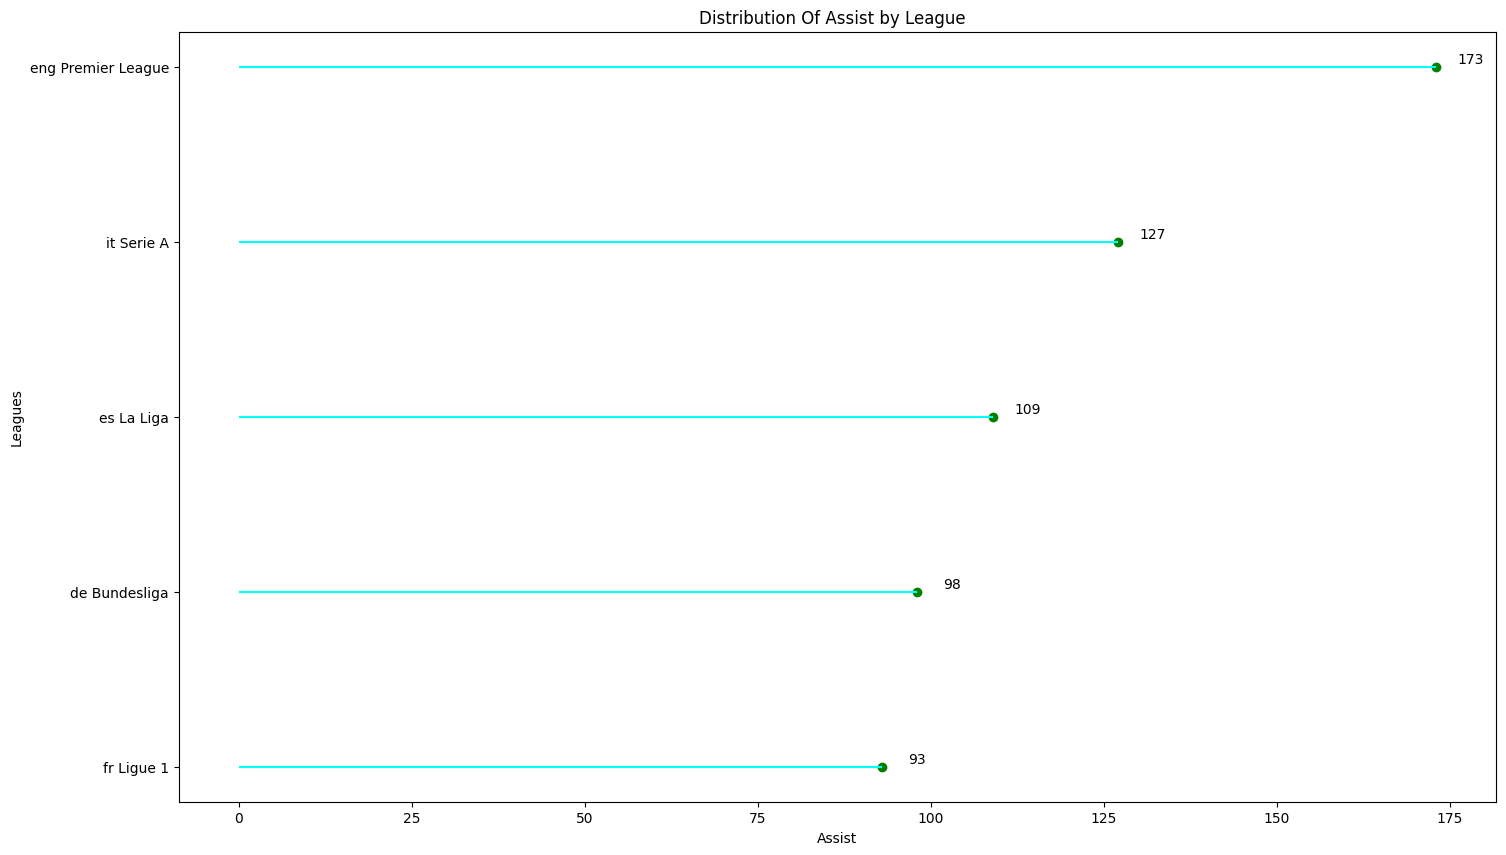

In [ ]:
# Distribution Of Assist by League  
plt.figure(figsize=(17,10))
plt.hlines(y=League_assist["Comp"],xmin=0,xmax=League_assist['Assist'],colors='cyan')
plt.scatter(League_assist['Assist'],League_assist["Comp"],color='g')
# Invert y-axis so highest is on top
plt.gca().invert_yaxis()
# Write the values ​​in the plot
for i , a in enumerate(League_assist["Assist"]):
    plt.text(League_assist["Assist"].iloc[i]+5,i,a,ha='center',va='bottom')
# Add title and labels
plt.title("Distribution Of Assist by League  ")
plt.xlabel("Assist")
plt.ylabel("Leagues")


C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\1470861330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Ast"],palette='Greens_r',ax=axes[i])
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\1470861330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Ast"],palette='Greens_r',ax=axes[i])
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\1470861330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Ast"],palette='Greens_r',ax=axes[i])
C:\Users\aouam\AppData

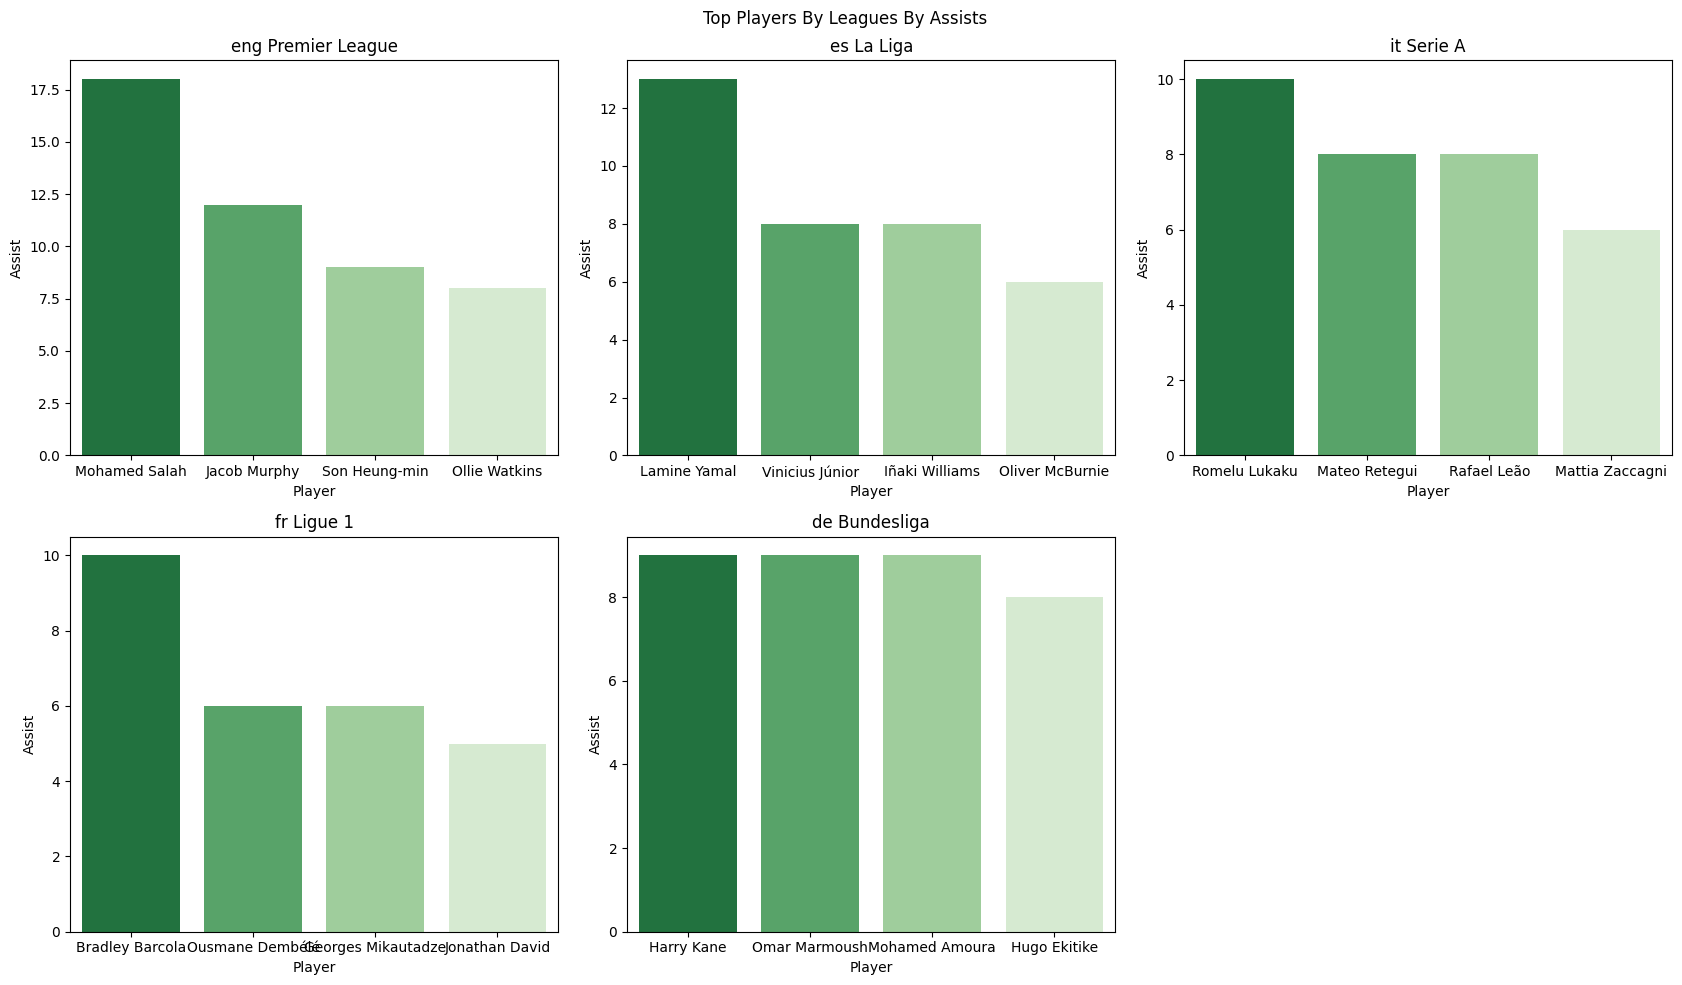

In [ ]:
# Top Players By Leagues By Assists
fig,axes=plt.subplots(2,3,figsize=(17,10))
axes=axes.flatten()
for i,league in enumerate(Leagues):
    data=att_data[att_data["Comp"]==league]
    data=data.sort_values(by='Ast',ascending=False).head(4)
    sns.barplot(x=data["Player"],y=data["Ast"],palette='Greens_r',ax=axes[i])
    axes[i].set_title(league)
    axes[i].set_ylabel('Assist')
plt.suptitle("Top Players By Leagues By Assists")
# Delete the empty plots 
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()

In [118]:
# Min , Max and Average age for each Team
Team_age=att_data.groupby('Squad').agg(
    Min=("Age",'min'),
    Max=("Age",'max'),
    Average=("Age",'mean')
).sort_values(by='Average',ascending=False).reset_index().rename(lambda x:x+1)
Team_age


,Squad,Min,Max,Average
1,Osasuna,33.0,33.0,33.000000
2,Monza,28.0,34.0,30.000000
3,Inter,26.0,35.0,29.750000
4,Alavés,26.0,34.0,29.250000
5,Nott'ham Forest,26.0,32.0,29.000000
...,...,...,...,...
91,Rennes,16.0,29.0,21.000000
92,Strasbourg,21.0,21.0,21.000000
93,Manchester City,18.0,24.0,20.500000
94,Monaco,17.0,23.0,20.333333


Text(0.5, 0, 'Average age')

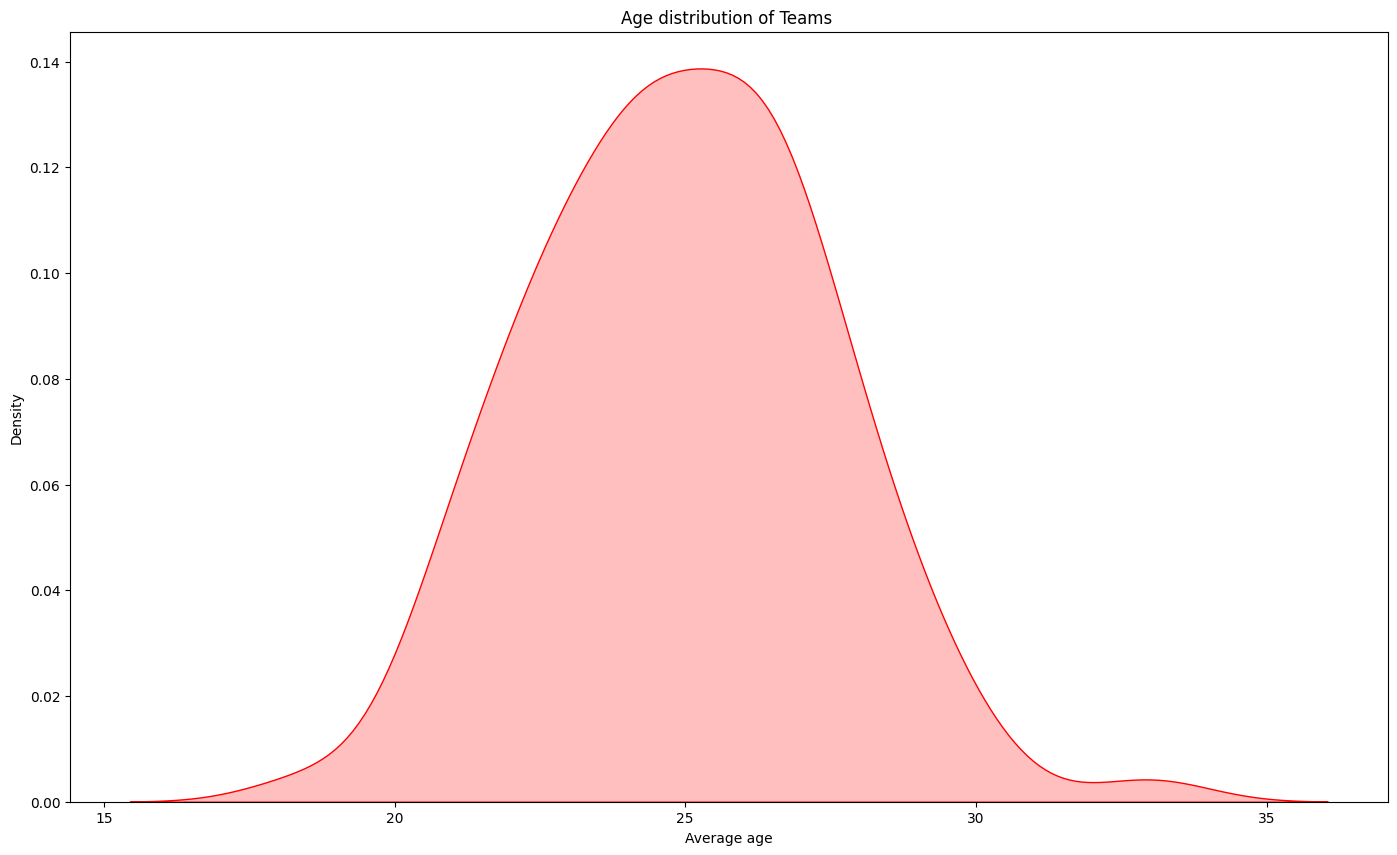

In [ ]:
# Age distribution of Teams 
plt.figure(figsize=(17,10))
sns.kdeplot(Team_age['Average'],fill=True,color='r')
# Add title and labels
plt.title("Age distribution of Teams ")
plt.xlabel("Average age")

In [120]:
# Distribution of goals by Team 
Team_goals=att_data.groupby('Squad').agg(
    Goals=('Gls','sum'),
).sort_values(by='Goals',ascending=False).reset_index().rename(lambda x:x+1)
Team_goals

,Squad,Goals
1,Liverpool,63
2,Paris S-G,51
3,Brentford,50
4,Real Madrid,43
5,Bayern Munich,42
...,...,...
91,Valladolid,4
92,Empoli,3
93,Rennes,3
94,Heidenheim,2


C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\621223611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp['Squad'],y=temp["Goals"],palette='rainbow')


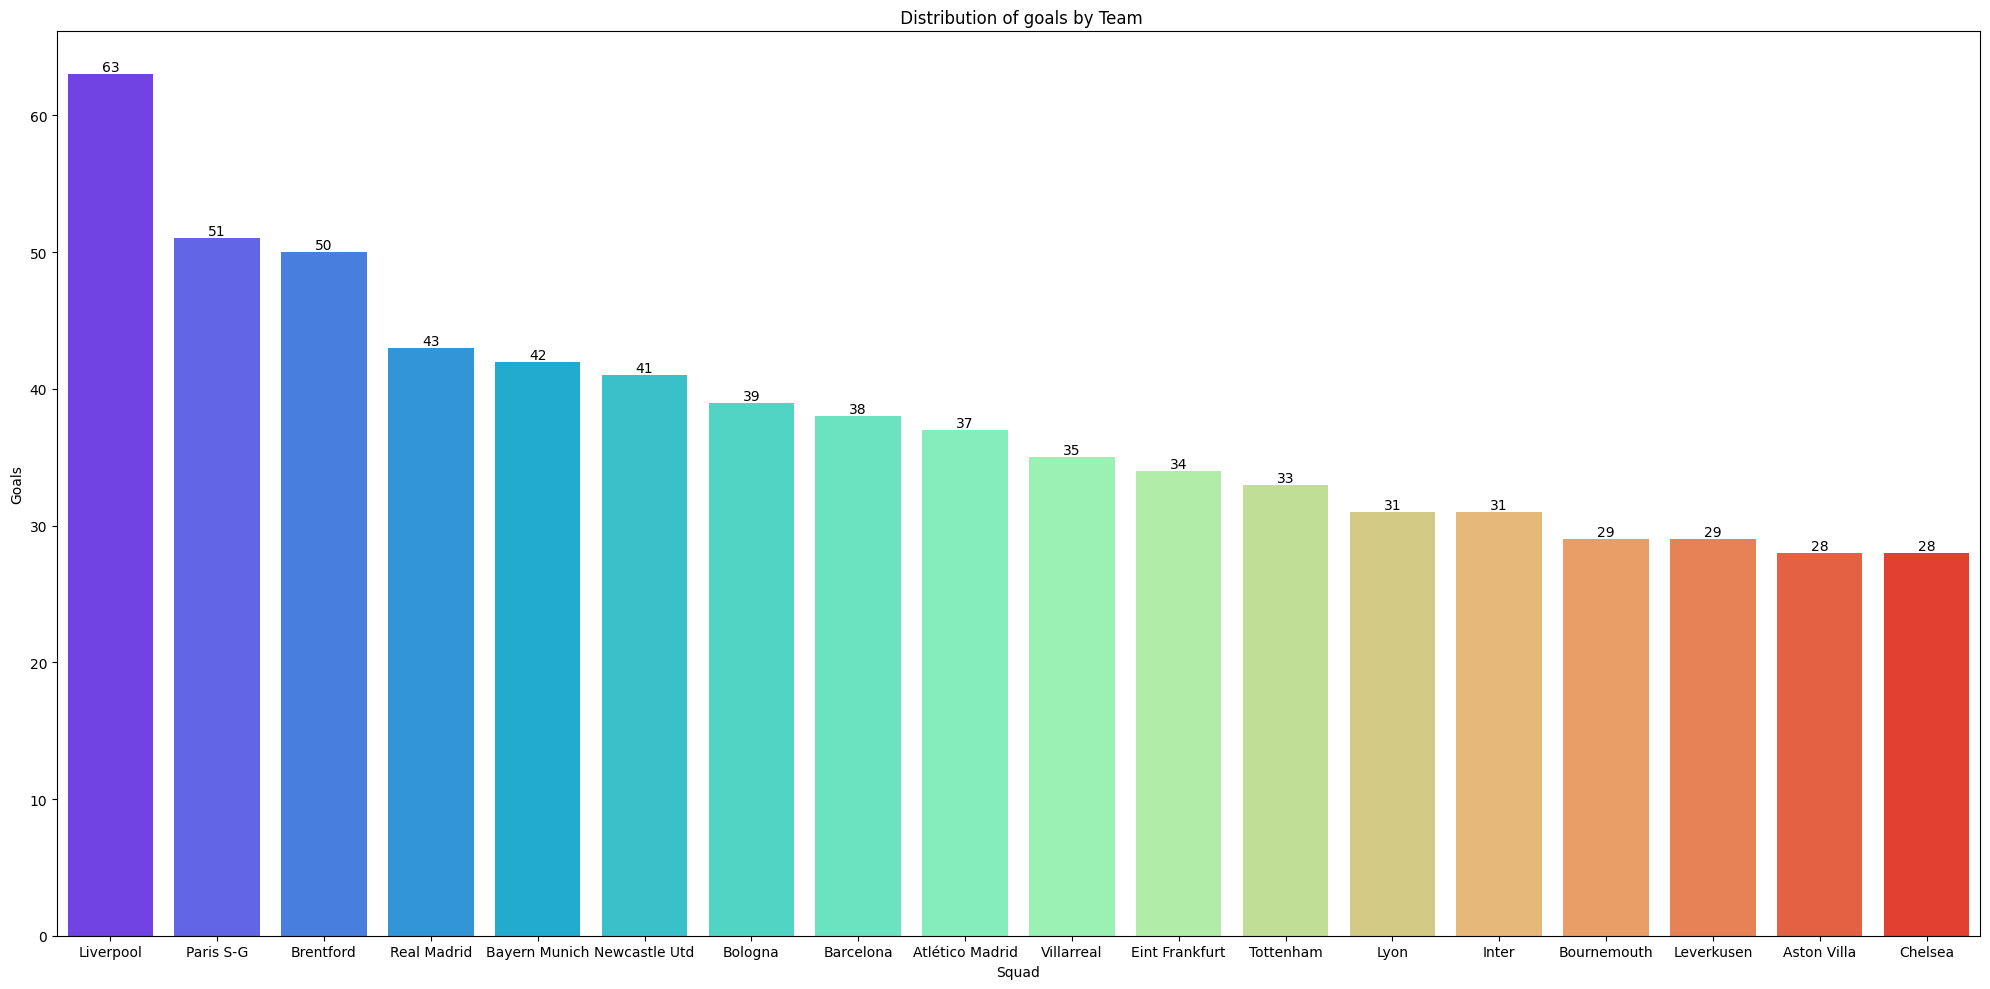

In [ ]:
# Distribution of goals by Team
plt.figure(figsize=(20,10))
temp=Team_goals.head(18)
sns.barplot(x=temp['Squad'],y=temp["Goals"],palette='rainbow')
# Write the values ​​in the plot
for i,g in enumerate(temp["Goals"]):
    plt.text(i,g,str(g),ha='center',va='bottom')
# Add title and labels
plt.title(" Distribution of goals by Team")
plt.tight_layout()

C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\151250836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Gls"],palette='Reds_r',ax=axes[i])
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\151250836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Gls"],palette='Reds_r',ax=axes[i])
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\151250836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Gls"],palette='Reds_r',ax=axes[i])
C:\Users\aouam\AppData\Local\Te

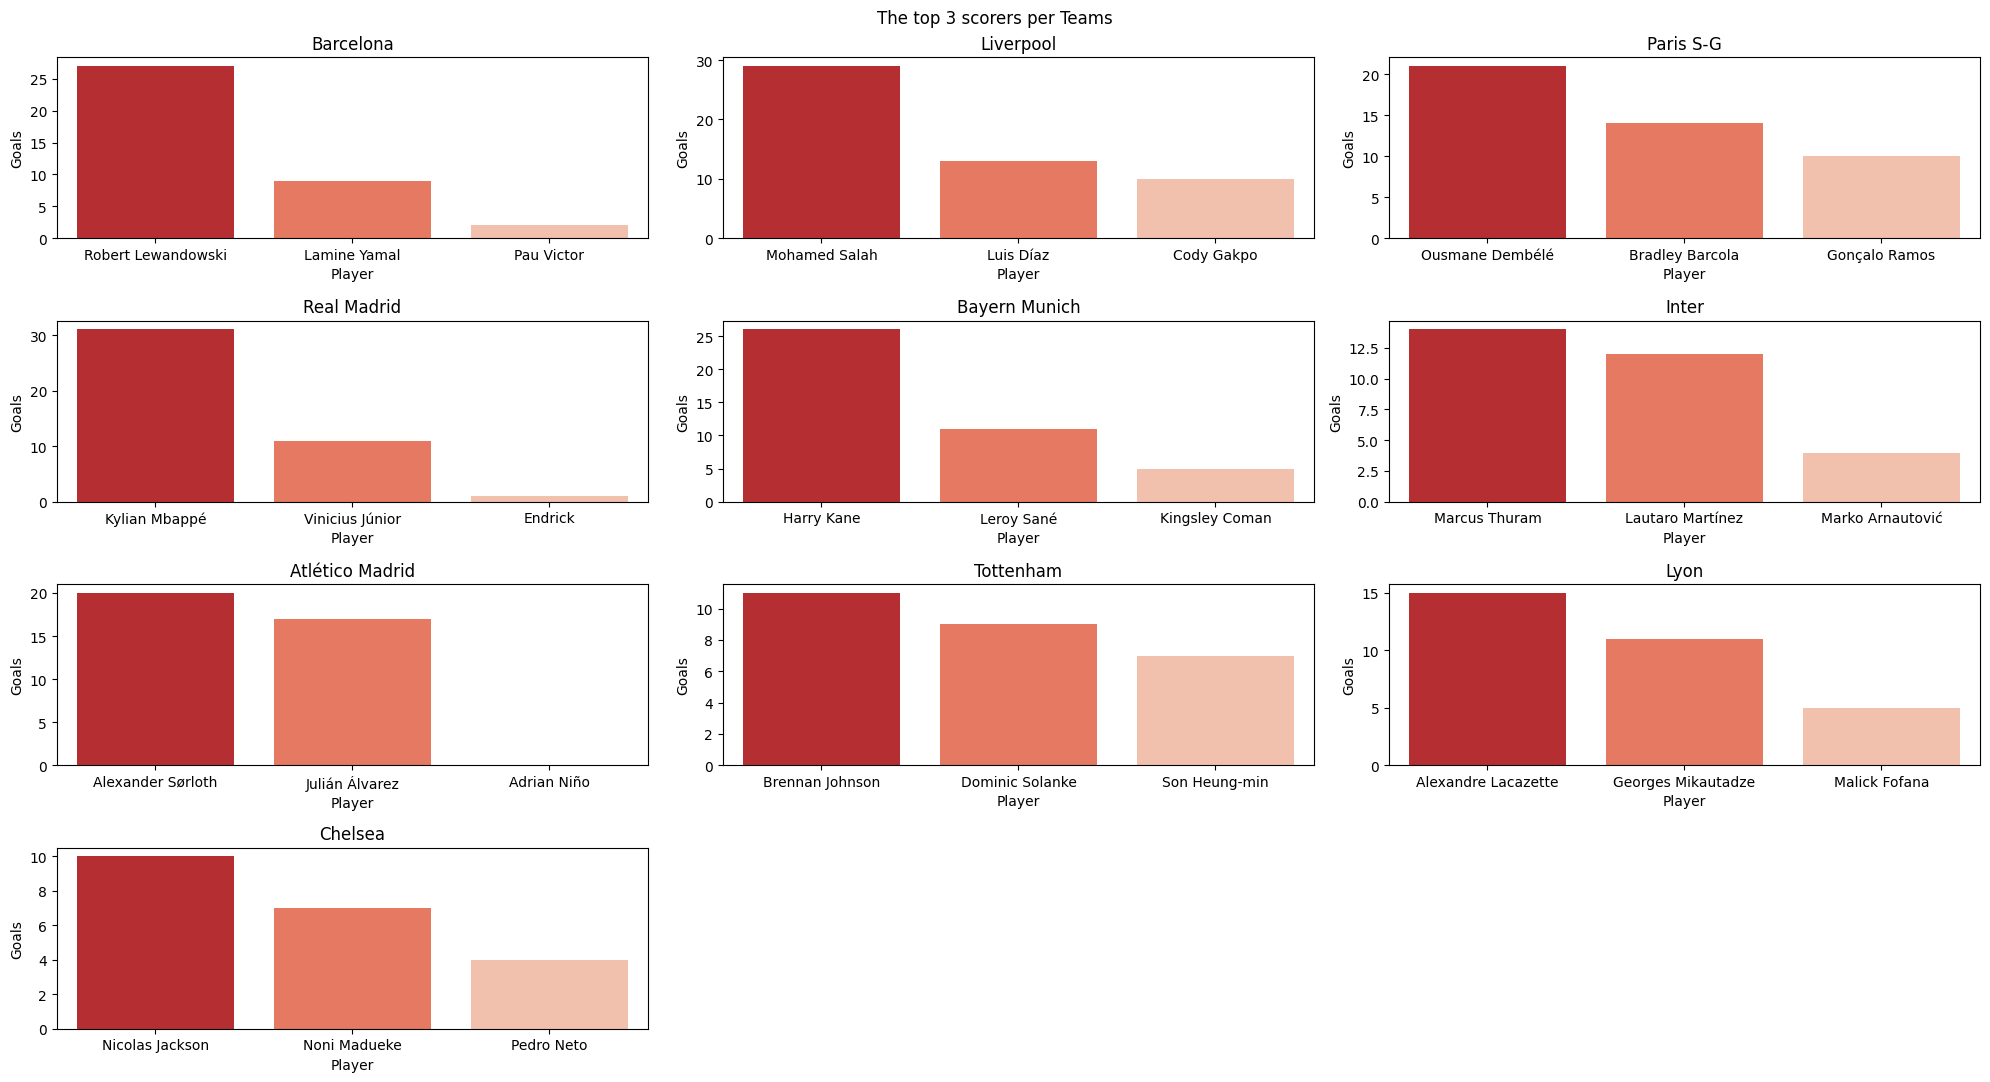

In [ ]:
# The top 3 scorers per Teams
Teams=["Barcelona","Liverpool","Paris S-G","Real Madrid","Bayern Munich","Inter","Atlético Madrid","Tottenham","Lyon","Chelsea"]
fig,axes=plt.subplots(4,3,figsize=(20,11))
axes=axes.flatten()
for i,team in enumerate(Teams):
    data=att_data[att_data["Squad"]==team]
    data=data.sort_values(by='Gls',ascending=False).head(3)
    sns.barplot(x=data["Player"],y=data["Gls"],palette='Reds_r',ax=axes[i])
    axes[i].set_title(team)
    axes[i].set_ylabel("Goals")
# Delete the empty plots
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
# Add title and labels
plt.suptitle("The top 3 scorers per Teams")
plt.tight_layout()
    

In [156]:
# Distribution Of Assist by Team
Team_assist=att_data.groupby('Squad').agg(
    Assist=("Ast",'sum')
).sort_values(by='Assist',ascending=False).reset_index().rename(lambda x:x+1)
Team_assist

,Squad,Assist
1,Liverpool,32
2,Paris S-G,23
3,Newcastle Utd,22
4,Chelsea,21
5,Bologna,19
...,...,...
91,Southampton,1
92,Empoli,0
93,Manchester Utd,0
94,Rennes,0


Text(0.5, 0, 'Assist')

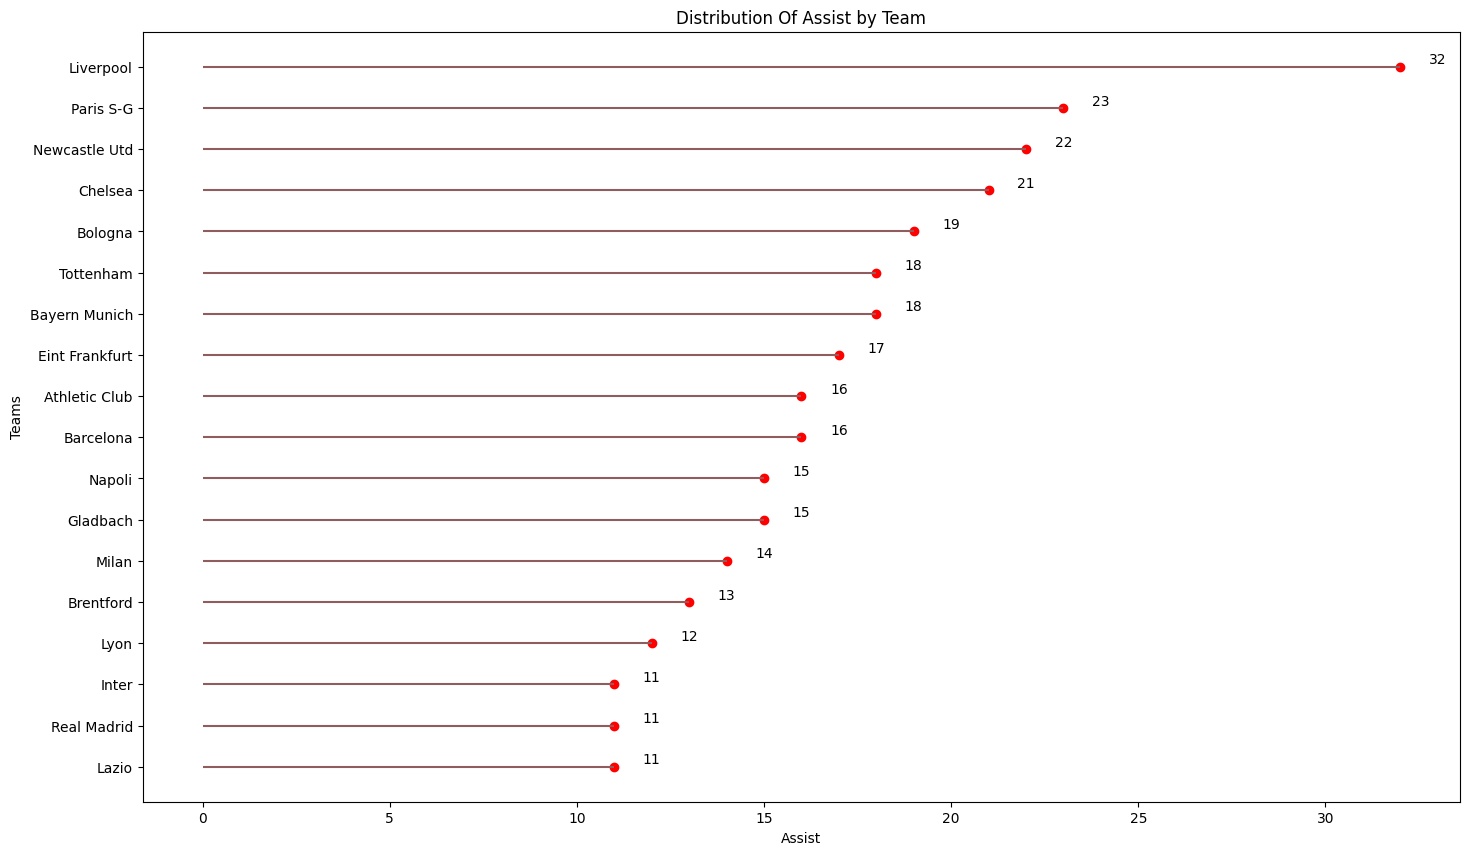

In [ ]:
# Distribution Of Assist by Team
plt.figure(figsize=(17,10))
temp=Team_assist.head(18)
plt.hlines(y=temp["Squad"],xmin=0,xmax=temp["Assist"],colors="#8f5d5d")
plt.scatter(temp["Assist"],temp["Squad"],c='#ff0000')
# Invert y-axis so highest is on top
plt.gca().invert_yaxis()
# Write the values ​​in the plot
for i,a in enumerate(temp["Assist"]):
    plt.text(temp["Assist"].iloc[i] + 1,i,a,ha='center',va='bottom')
# Add title and labels
plt.title("Distribution Of Assist by Team")
plt.xlabel("Assist")
plt.ylabel("Teams")
plt.xlabel("Assist")

C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\2430605963.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Ast"],ax=axes[i],palette='Reds_r')
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\2430605963.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Ast"],ax=axes[i],palette='Reds_r')
C:\Users\aouam\AppData\Local\Temp\ipykernel_12268\2430605963.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Player"],y=data["Ast"],ax=axes[i],palette='Reds_r')
C:\Users\aouam\AppData\Local

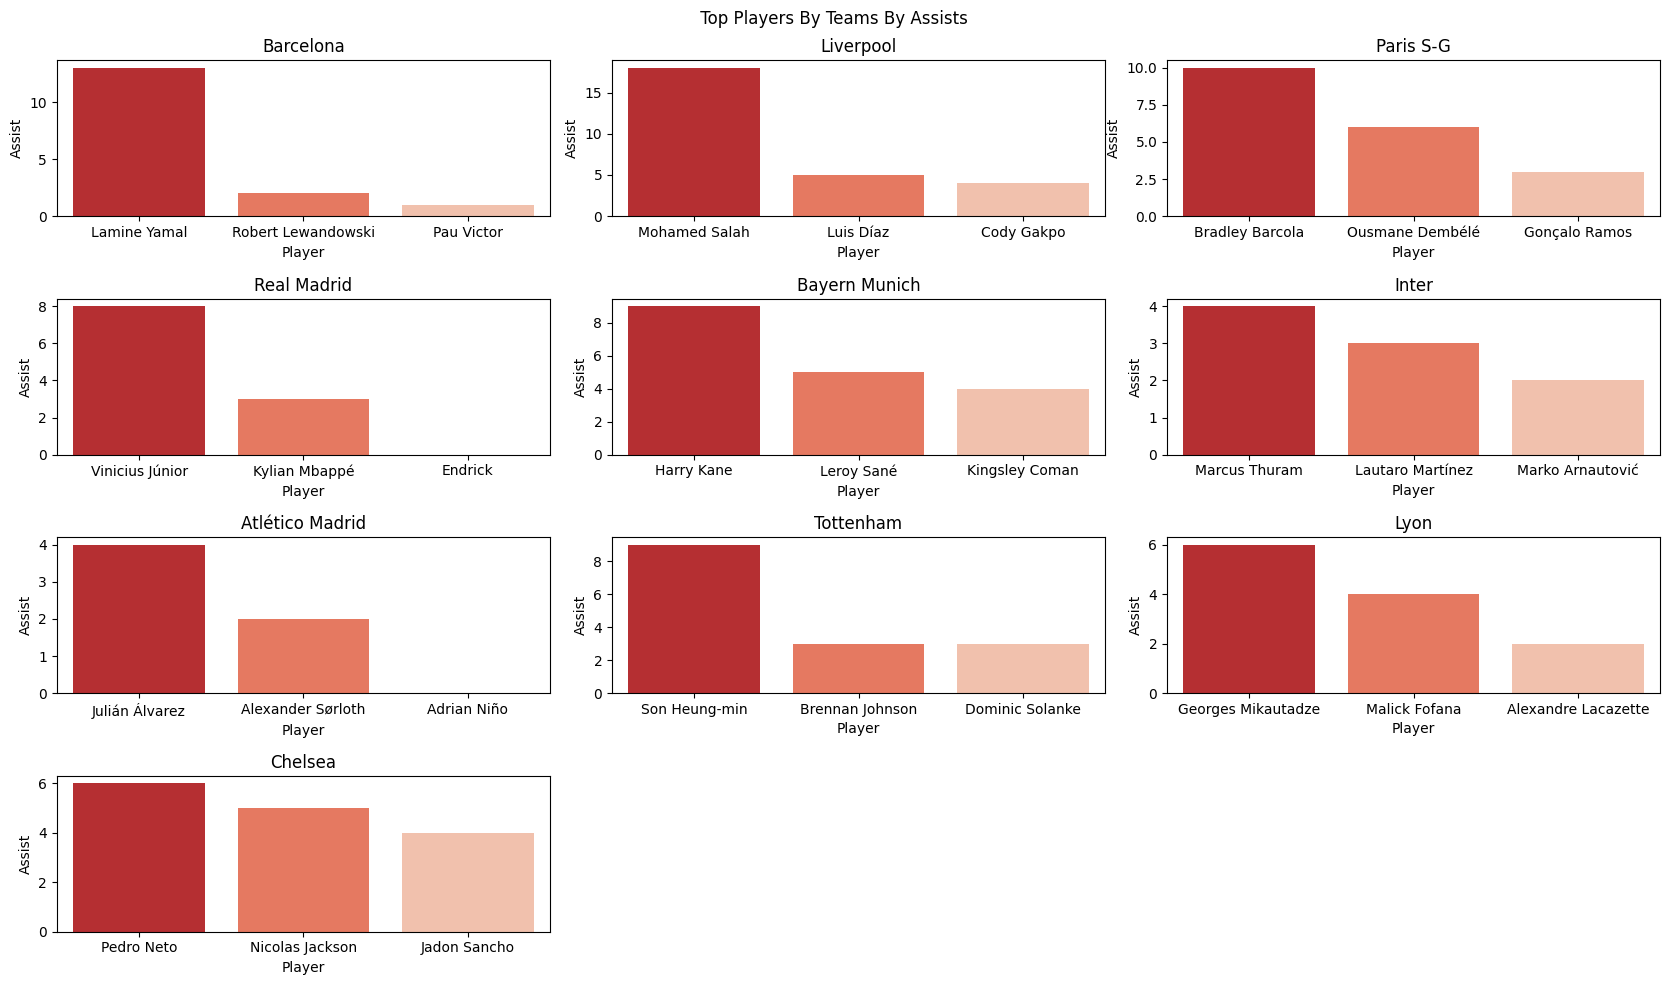

In [ ]:
# Top Players By Teams By Assists
fig,axes=plt.subplots(4,3,figsize=(17,10))
axes=axes.flatten()
for i, team in enumerate(Teams):
    data=att_data[att_data["Squad"]==team]
    data=data.sort_values(by='Ast',ascending=False).head(3)
    sns.barplot(x=data["Player"],y=data["Ast"],ax=axes[i],palette='Reds_r')
    axes[i].set_title(team)
    axes[i].set_ylabel("Assist")
# Delete the empty plots
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
# Add title and labels
plt.suptitle(" Top Players By Teams By Assists")
plt.tight_layout()


In [ ]:
# The best 3 Forwards in the top 5 Leagues by points
Best=att_data.groupby("Player").agg(
    Goals=('Gls','sum'),
    Assist=('Ast','sum'),
    G_PK=('G-PK','sum'),
    Points=('Points','sum')
).sort_values(by='Points',ascending=False).reset_index().rename(lambda x:x+1)
print(f"The best 3 Forwards in the top 5 Leagues : \n 1: {Best['Player'][1] } : {Best['Points'][1] } points . \n 2: {Best['Player'][2] } : {Best['Points'][2] } points . \n 3: {Best['Player'][3] } : {Best['Points'][3] } points .")
Best

The best 3 Forwards in the top 5 Leagues : 
 1: Mohamed Salah : 141 points . 
 2: Harry Kane : 114 points . 
 3: Kylian Mbappé : 113 points .


,Player,Goals,Assist,G_PK,Points
1,Mohamed Salah,29,18,20,141
2,Harry Kane,26,9,17,114
3,Kylian Mbappé,31,3,24,113
4,Mateo Retegui,25,8,21,99
5,Robert Lewandowski,27,2,24,91
...,...,...,...,...,...
355,Sébastien Haller,0,0,0,0
356,Aaron Malouda,0,0,0,0
357,Xavier Moreno,0,0,0,0
358,Thomas Campaniello,0,0,0,0
